The Project has the following structure: Data Analysis -> Feature Engineering -> Model Development -> Web App

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
pd.set_option('display.max_columns', None)  

In [94]:
sns.set_style("whitegrid")

Loading Data and Exploration

In [95]:
df = pd.read_csv("german_credit_data.csv")

In [96]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [97]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [98]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [99]:
df.shape

(1000, 11)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [101]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df["Job"].unique()

array([2, 1, 3, 0], dtype=int64)

In [103]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [104]:
df.duplicated().sum()

0

In [105]:
df= df.dropna().reset_index(drop=True)

In [106]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [107]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [108]:
df.drop(columns="Unnamed: 0", inplace=True)

In [109]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [110]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


Data Visualization and Analysis

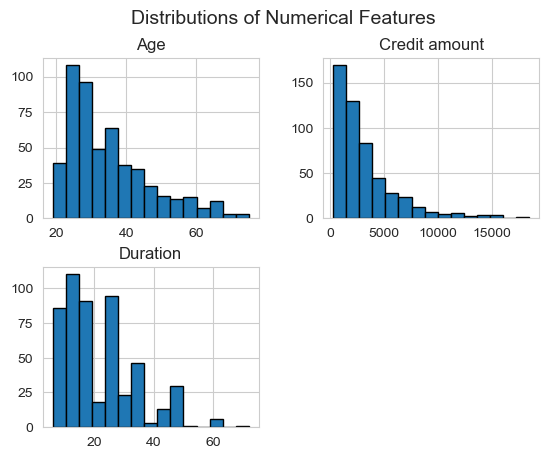

In [111]:
df[["Age", "Credit amount", "Duration"]].hist(bins=15, edgecolor="black")
plt.suptitle("Distributions of Numerical Features", fontsize=14)
plt.show()

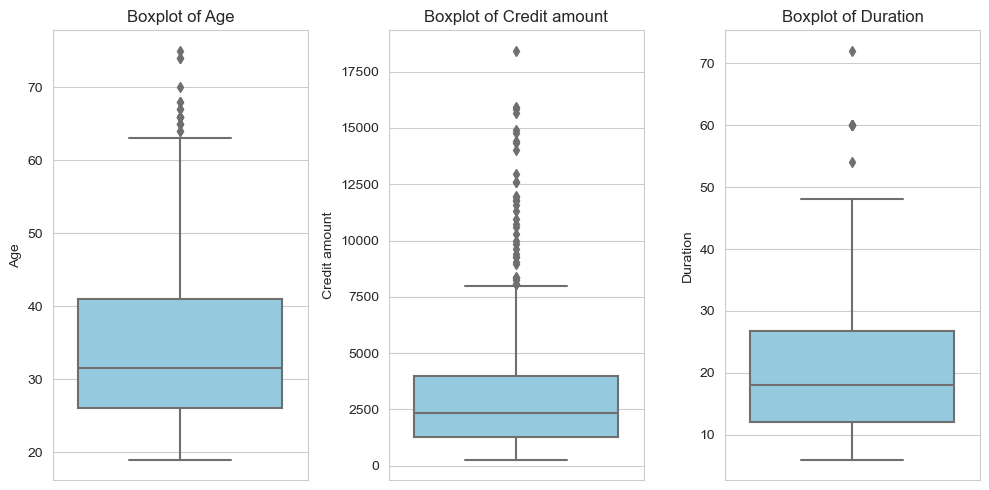

In [112]:
plt.figure(figsize=(10,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [113]:
df.query("Duration > 70")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [114]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [115]:
# Setting Categorical Features
categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

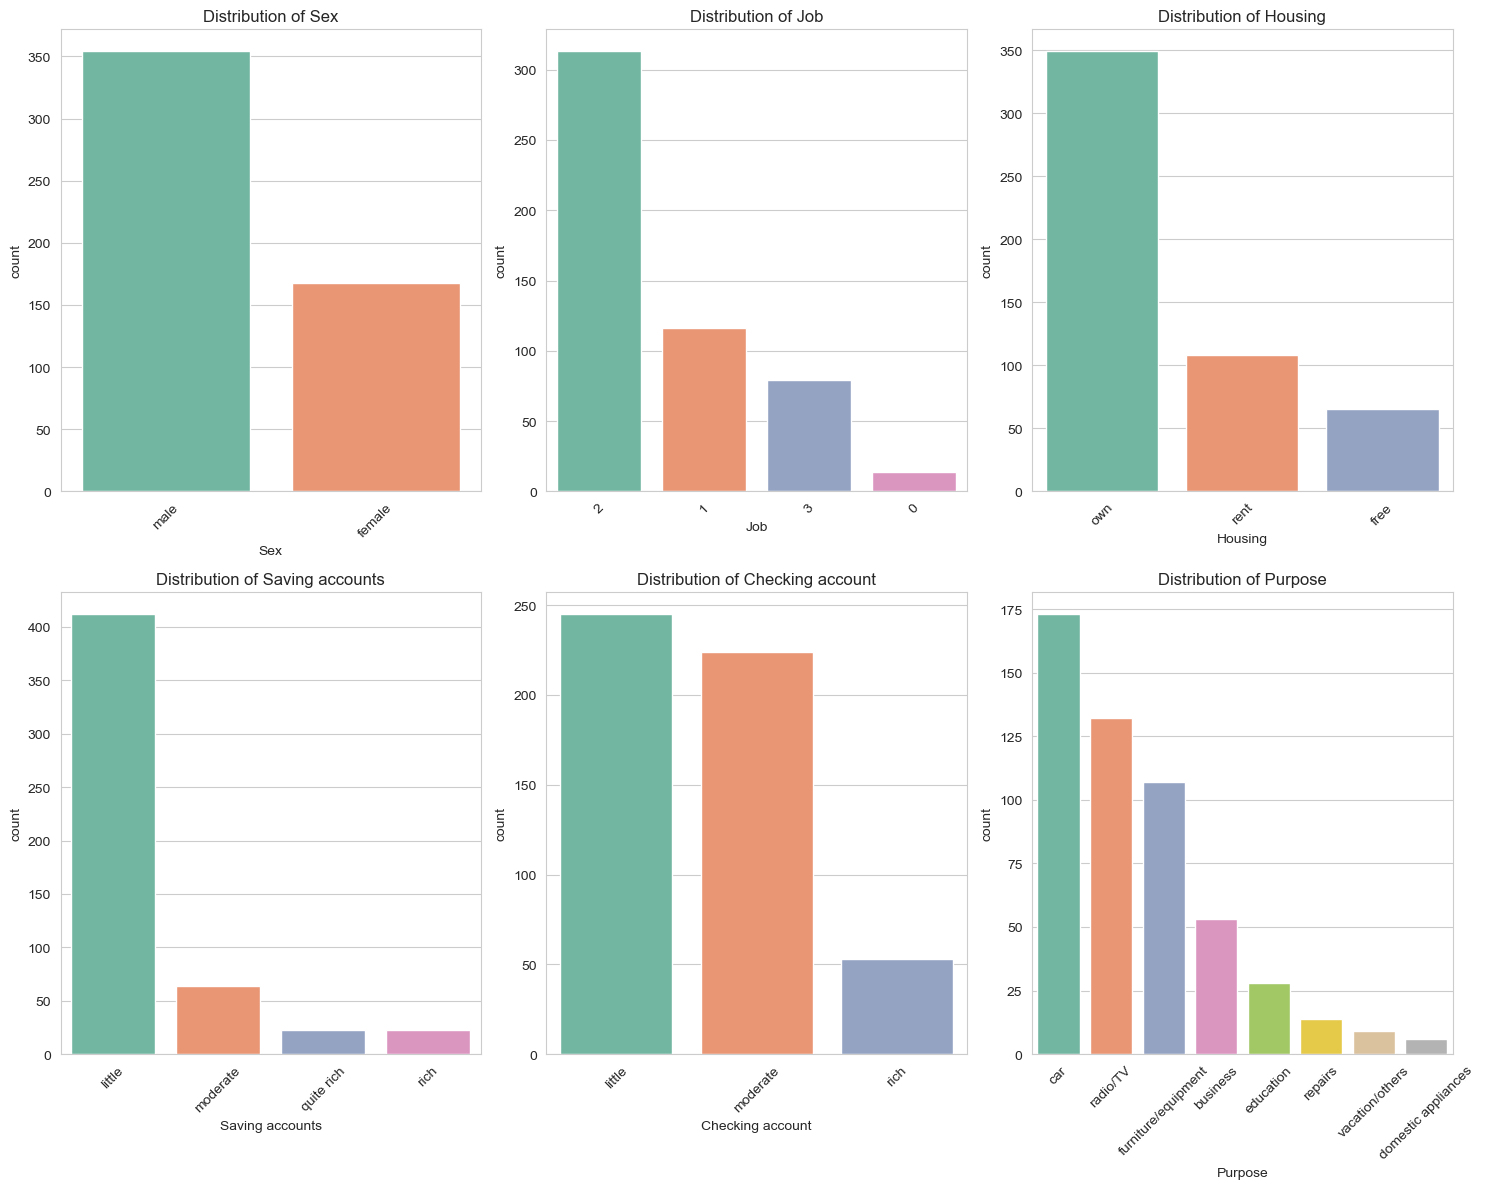

In [116]:
plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [117]:
correlation=df[["Age", "Job", "Credit amount", "Duration"]].corr()


In [118]:
correlation

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


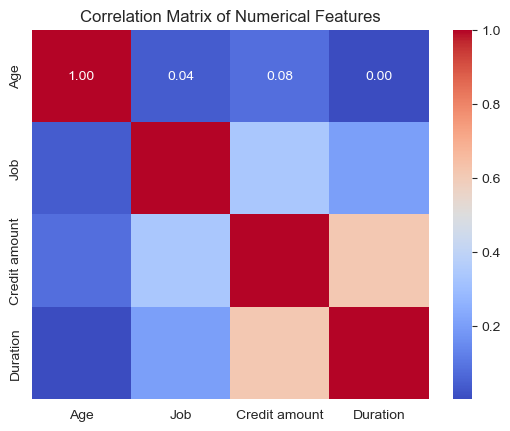

In [119]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [120]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [121]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [122]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


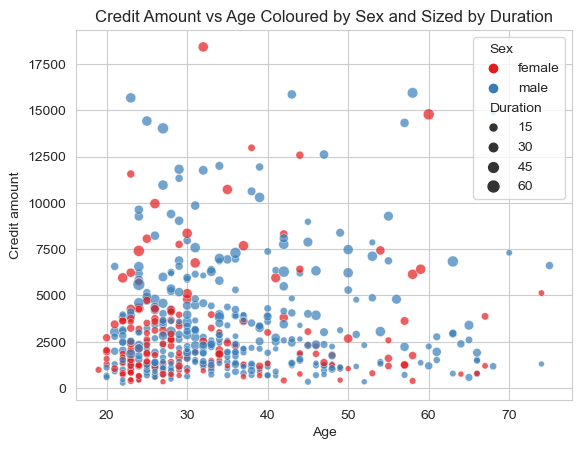

In [123]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue = "Sex", size = "Duration", alpha = 0.7, palette="Set1")
plt.title("Credit Amount vs Age Coloured by Sex and Sized by Duration")
plt.show()

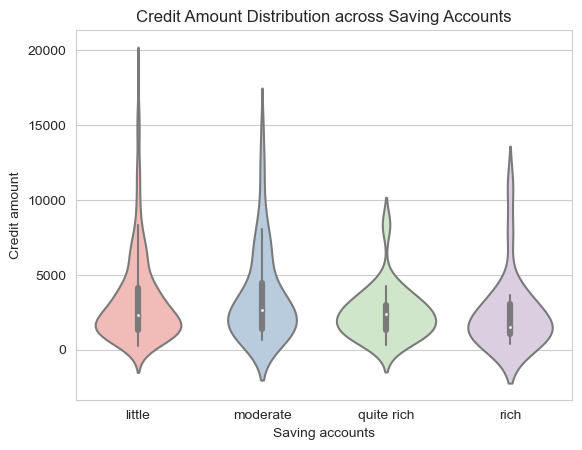

In [124]:
sns.violinplot(data = df, x = "Saving accounts", y = "Credit amount", palette="Pastel1")
plt.title("Credit Amount Distribution across Saving Accounts")
plt.show()

In [125]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

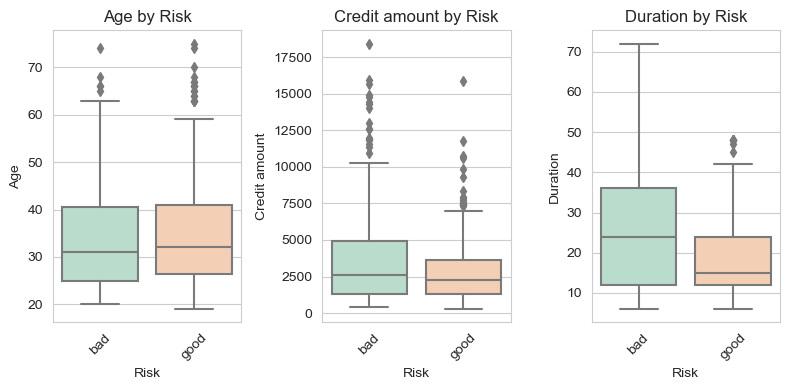

In [126]:
plt.figure(figsize=(8,4))
for i, col in enumerate(["Age","Credit amount", "Duration"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = df, x = "Risk", y = col, palette = "Pastel2")
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [127]:
df.groupby("Risk")[["Age","Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [128]:
categorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

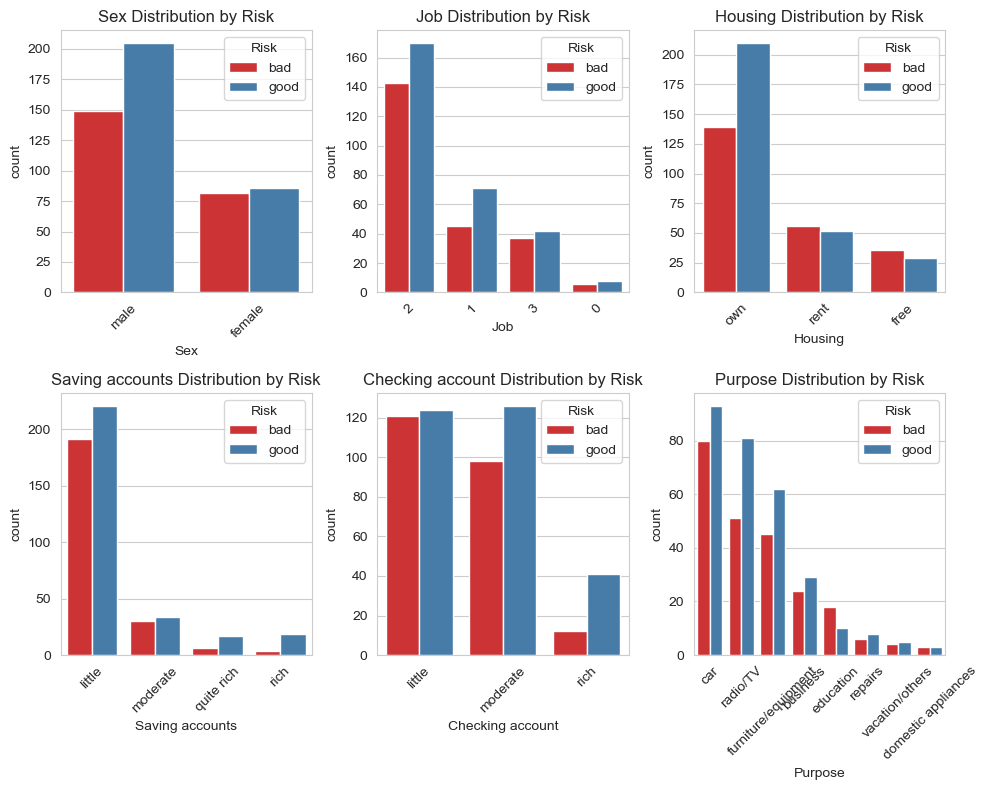

In [129]:
plt.figure(figsize=(10,8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, hue="Risk", palette="Set1", order=df[col].value_counts().index)
    plt.title(f"{col} Distribution by Risk")
    plt.xticks(rotation=45)
    plt.legend(title="Risk")

plt.tight_layout()
plt.show()

In [130]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Feature Engineering

In [131]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [132]:
target = "Risk"

In [133]:
df_model = df[features + [target]].copy()

In [134]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [135]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [136]:
categorical_cols = df_model.select_dtypes(include=['object']).columns.drop("Risk")

In [137]:
le_dict = {}

In [138]:
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")
    

In [139]:
le_target = LabelEncoder()
df_model[target] = le_target.fit_transform(df_model[target])

In [140]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [141]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [142]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


Model Development

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x = df_model.drop(target, axis=1)
y = df_model[target]

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [146]:
x_train.shape

(417, 8)

In [147]:
x_test.shape

(105, 8)

In [148]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [150]:
def train_model(model, param_grid, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_model, accuracy, grid_search.best_params_

In [151]:
decision_tree = DecisionTreeClassifier(random_state=1, class_weight='balanced')
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [152]:
best_dt, accuracy_dt, best_params_dt = train_model(decision_tree, param_grid_dt, x_train, y_train, x_test, y_test)

In [153]:
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.580952380952381


In [154]:
print("Best Decision Tree Model Parameters:", best_params_dt)

Best Decision Tree Model Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [155]:
random_forest = RandomForestClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [156]:
best_rf, accuracy_rf, best_params_rf = train_model(random_forest, param_grid_rf, x_train, y_train, x_test, y_test)

In [157]:
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.6190476190476191


In [158]:
print("Best Random Forest Model Parameters:", best_params_rf)

Best Random Forest Model Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [159]:
extra_trees = ExtraTreesClassifier(random_state=1, class_weight='balanced', n_jobs=-1)
param_grid_et = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [160]:
best_et, accuracy_et, best_params_et = train_model(extra_trees, param_grid_et, x_train, y_train, x_test, y_test)

In [161]:
print("Extra Trees Accuracy:", accuracy_et)

Extra Trees Accuracy: 0.6476190476190476


In [162]:
print("Best Extra Trees Model Parameters:", best_params_et)

Best Extra Trees Model Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [163]:
xg_boost = XGBClassifier(random_state=1, scale_pos_weight=(y_train==0).sum() / (y_train==1).sum(), use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

In [164]:
best_xgb, accuracy_xgb, best_params_xgb = train_model(xg_boost, param_grid_xgb, x_train, y_train, x_test, y_test)

c:\Users\obien\anaconda3A\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:36:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [165]:
print("XGBoost Accuracy:", accuracy_xgb)

XGBoost Accuracy: 0.6761904761904762


In [166]:
print("Best XGBoost Model Parameters:", best_params_xgb)

Best XGBoost Model Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [167]:
best_xgb.predict(x_test)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [168]:
joblib.dump(best_xgb, "xgboost_credit_model.pkl")

['xgboost_credit_model.pkl']